In [1]:
import os
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
#!pip install PyPDF2

import os
import pandas as pd
from PyPDF2 import PdfReader

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Error loading punkt: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading stopwords: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10060] A
[nltk_data]     connection attempt failed because the connected party
[nltk_data]     did not properly respond after a period of time, or
[nltk_data]     established connection failed because connected host
[nltk_data]     has failed to respond>


False

In [2]:


# Define function to extract text from PDF files
def extract_text_from_pdf(pdf_path):
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PdfReader(file)
        for page in reader.pages:
            text += page.extract_text()
    return text.strip()

# Create a DataFrame to store the extracted data
columns = ["category", "text"]
data = []

# Iterate over the PDF files and extract text
dataset_dir = "dataset_pdf"
for category in os.listdir(dataset_dir):
    category_dir = os.path.join(dataset_dir, category)
    if os.path.isdir(category_dir):
        for file_name in os.listdir(category_dir):
            if file_name.endswith(".pdf"):
                pdf_path = os.path.join(category_dir, file_name)
                text = extract_text_from_pdf(pdf_path)
                data.append([category, text])

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display DataFrame
print(df)

      category                                               text
0     business  ukraine revisits state sell-offs ukraine is pr...
1     business  winemaker rejects foster s offer australian wi...
2     business  making your office work for you our mission to...
3     business  uk coal plunges into deeper loss shares in uk ...
4     business  why few targets are better than many the econo...
...        ...                                                ...
2220      tech  gates opens biggest gadget fair bill gates has...
2221      tech  seamen sail into biometric future the luxury c...
2222      tech  video phone help for deaf people deaf people w...
2223      tech  concern over rfid tags consumers are very conc...
2224      tech  us hacker breaks into t-mobile a man is facing...

[2225 rows x 2 columns]


In [3]:
df.head()

,category,text
0,business,ukraine revisits state sell-offs ukraine is pr...
1,business,winemaker rejects foster s offer australian wi...
2,business,making your office work for you our mission to...
3,business,uk coal plunges into deeper loss shares in uk ...
4,business,why few targets are better than many the econo...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


In [7]:
df.shape

(2225, 2)

In [8]:
df["category"].value_counts()

category
sport            511
business         510
politics         417
tech             401
entertainment    386
Name: count, dtype: int64

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'business'),
  Text(1, 0, 'entertainment'),
  Text(2, 0, 'politics'),
  Text(3, 0, 'sport'),
  Text(4, 0, 'tech')])

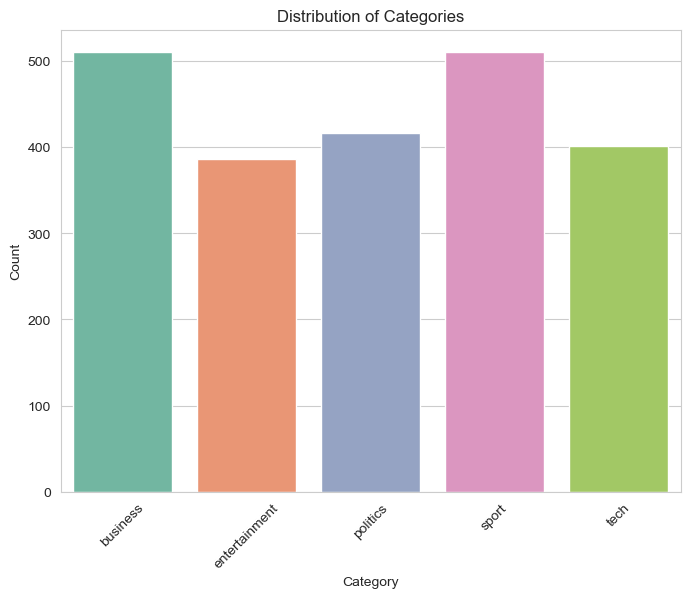

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")


plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='category', palette='Set2')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45)

sport: This is a category label. It represents a category in the dataset, likely indicating news articles, documents, or texts related to sports.

business: Similarly, this is another category label representing documents related to business.

politics: This category represents documents or texts related to politics.

tech: This category indicates documents related to technology.

entertainment: Finally, this category represents documents related to entertainment.

The numbers beside each category represent the count of documents or texts associated with that particular category. For example:

There are 511 documents related to sports.
There are 510 documents related to business.
There are 417 documents related to politics.
There are 401 documents related to technology.
There are 386 documents related to entertainment.
This visualization provides a clear overview of the distribution of documents across different categories, helping to understand the dataset's composition and balance. It helps identify which categories have more or fewer documents, which can be useful for various analytical purposes.

In [10]:
 # Preprocessing
def preprocess_text1(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [11]:
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove numbers and punctuation
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # Tokenization
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Join tokens back into text
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

In [12]:
df['text'] = df['text'].apply(preprocess_text)

In [13]:
# Define pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=10000)),
    ('clf', MultinomialNB())
])

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['category'], test_size=0.2, random_state=42)

# Fit the model using the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9685393258426966
Classification Report:
               precision    recall  f1-score   support

     business       0.97      0.97      0.97       115
entertainment       0.97      0.97      0.97        72
     politics       0.95      0.97      0.96        76
        sport       0.99      1.00      1.00       102
         tech       0.96      0.91      0.94        80

     accuracy                           0.97       445
    macro avg       0.97      0.97      0.97       445
 weighted avg       0.97      0.97      0.97       445



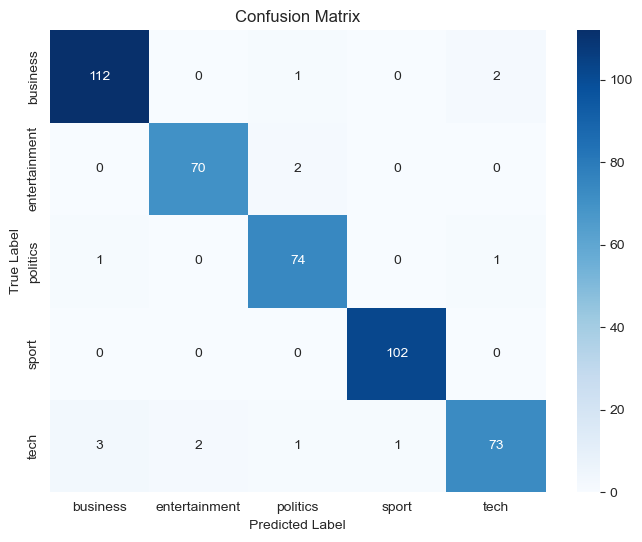

In [14]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=pipeline.classes_, yticklabels=pipeline.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [4]:
# Sample new text
#new_text = "worldcom boss  left books alone  former worldcom boss bernie ebbers  who is accused of overseeing an $11bn (�5.8bn) fraud  never made accounting decisions  a witness has told jurors.  david myers made the comments under questioning by defence lawyers who have been arguing that mr ebbers was not responsible for worldcom s problems. the phone company collapsed in 2002 and prosecutors claim that losses were hidden to protect the firm s shares. mr myers has already pleaded guilty to fraud and is assisting prosecutors.  on monday  defence lawyer reid weingarten tried to distance his client from the allegations. during cross examination  he asked mr myers if he ever knew mr ebbers  make an accounting decision  .  not that i am aware of   mr myers replied.  did you ever know mr ebbers to make an accounting entry into worldcom books   mr weingarten pressed.  no   replied the witness. mr myers has admitted that he ordered false accounting entries at the request of former worldcom chief financial officer scott sullivan. defence lawyers have been trying to paint mr sullivan  who has admitted fraud and will testify later in the trial  as the mastermind behind worldcom s accounting house of cards.  mr ebbers  team  meanwhile  are looking to portray him as an affable boss  who by his own admission is more pe graduate than economist. whatever his abilities  mr ebbers transformed worldcom from a relative unknown into a $160bn telecoms giant and investor darling of the late 1990s. worldcom s problems mounted  however  as competition increased and the telecoms boom petered out. when the firm finally collapsed  shareholders lost about $180bn and 20 000 workers lost their jobs. mr ebbers  trial is expected to last two months and if found guilty the former ceo faces a substantial jail sentence. he has firmly declared his innocence."
new_text="sachin is batsman"
# Preprocess the new text
preprocessed_new_text = preprocess_text(new_text)

# Make prediction using the trained model
predicted_category = pipeline.predict([preprocessed_new_text])[0]

print("Predicted category:", predicted_category)


NameError: name 'preprocess_text' is not defined